In [1]:
import pandas as pd

df = pd.read_csv('data/fish.csv')

In [2]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [6]:
cond = df['Species'].isin(['Bream','Smelt'])

In [8]:
fish_data = df.loc[cond, ['Length2','Weight']]

In [10]:
fish_target = df.loc[ cond, ['Species']]

In [11]:
fish_target.head()

,Species
0,Bream
1,Bream
2,Bream
3,Bream
4,Bream


In [12]:
# 자동으로 나눠주는 함수 
from sklearn.model_selection import train_test_split


In [13]:
train_test_split(fish_data, fish_target) 

[     Length2  Weight
 32      39.5   925.0
 24      35.0   700.0
 149     11.2     9.8
 12      31.5   500.0
 7       30.0   390.0
 31      38.5   955.0
 25      35.0   725.0
 156     13.0    12.2
 154     12.2    12.2
 153     12.0     9.8
 2       26.5   340.0
 145      9.8     6.7
 14      32.0   600.0
 18      33.5   610.0
 148     11.0     9.7
 146     10.5     7.5
 150     11.3     8.7
 147     10.6     7.0
 29      37.0  1000.0
 152     11.8     9.9
 28      36.0   850.0
 158     15.0    19.9
 20      34.0   575.0
 3       29.0   363.0
 8       30.0   450.0
 6       29.7   500.0
 16      33.0   700.0
 33      41.0   975.0
 30      38.5   920.0
 22      34.5   620.0
 1       26.3   290.0
 0       25.4   242.0
 13      32.0   340.0
 157     14.3    19.7
 34      41.0   950.0
 23      35.0   680.0,
      Length2  Weight
 9       30.7   500.0
 26      35.0   720.0
 17      33.0   700.0
 15      32.0   600.0
 151     11.8    10.0
 21      34.0   685.0
 10      31.0   475.0
 155     

In [23]:
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state = 40)

stratify=fish_target ==> 샘플 골고루 섞이지 않을 때 

In [25]:
test_target

,Species
24,Bream
7,Bream
150,Smelt
5,Bream
12,Bream
1,Bream
6,Bream
30,Bream
27,Bream
155,Smelt


In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
kn = KNeighborsClassifier()

In [31]:
kn.fit(train_input, train_target['Species'])
#최근접 알고리즘 fit은 1차원을 기대하고 있음, 그런데 우리가 가지고 있는 것은 데이터 프레임의 형태라서 살짝 바꿔줘야함 
#행의 정보만 뽑아와야함 

KNeighborsClassifier()

In [33]:
kn.score(test_input, test_target)

1.0

In [34]:
kn.predict([[50, 300]])
#대괄호 두개인거 유의. 두개를 넣어야 데이터 프레임 영역으로 확장할수 있음

C:\Users\2-23\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

In [39]:
import matplotlib.pyplot as plt

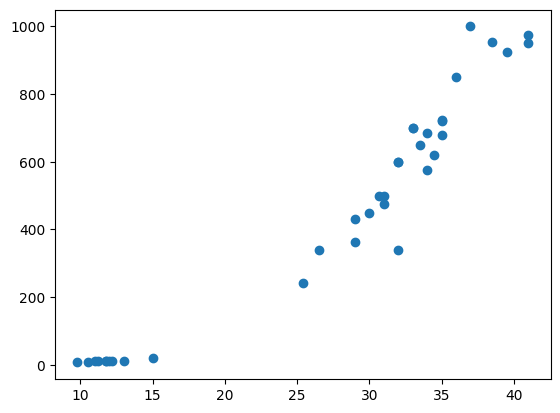

In [41]:
plt.scatter(train_input['Length2'], train_input['Weight'])
plt.show()

In [42]:
kn.kneighbors([[25,150]])
#이웃이 누구인지 말해주는 것 

C:\Users\2-23\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[ 92.00086956, 130.48375378, 138.32150953, 138.39320793,
         140.62090883]]),
 array([[23, 31,  1,  3, 10]]))

In [43]:
distance, indexes = kn.kneighbors([[25,150]])

C:\Users\2-23\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [44]:
indexes

array([[23, 31,  1,  3, 10]])

In [45]:
train_input.iloc[indexes[0]]

,Length2,Weight
0,25.4,242.0
158,15.0,19.9
156,13.0,12.2
154,12.2,12.2
151,11.8,10.0


In [46]:
n_df = train_input.iloc[indexes[0]]
#이웃 목록 

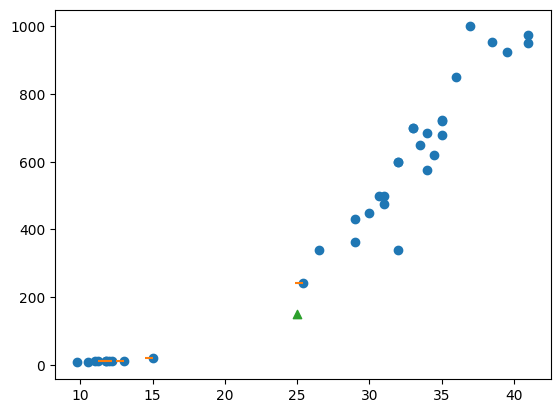

In [48]:
plt.scatter(train_input['Length2'], train_input['Weight'])
plt.scatter(n_df['Length2'], n_df['Weight'], marker = 0)
plt.scatter(25, 150, marker='^')
plt.show()
#직관적으로 봤을 때는 브림 같은데, 이웃 판단에 의해서 빙어가 됨 ;; 
#표준점수 활용해서 해결하기 

- 표준점수
  (데이터 - 평균) / 표준편차
  

In [51]:
mean = train_input.mean()

In [52]:
std = train_input.std()

In [53]:
train_input.head()

,Length2,Weight
149,11.2,9.8
156,13.0,12.2
32,39.5,925.0
154,12.2,12.2
152,11.8,9.9


In [54]:
(train_input - mean).head()

,Length2,Weight
149,-16.213889,-452.913889
156,-14.413889,-450.513889
32,12.086111,462.286111
154,-15.213889,-450.513889
152,-15.613889,-452.813889


In [60]:
train_scaled = ((train_input - mean) / std)
#표준편차 

In [61]:
new = ([25, 100] - mean) / std
new

Length2   -0.232394
Weight    -1.075002
dtype: float64

In [62]:
kn.fit(train_scaled, train_target['Species'])

KNeighborsClassifier()

In [63]:
kn.score(test_input, test_target)

0.6923076923076923

In [65]:
kn.score(test_scaled, test_target)

1.0

In [64]:
test_scaled = ((test_input - mean)/std)

In [66]:
kn.predict([new])

C:\Users\2-23\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Bream'], dtype=object)

### 펭귄 데이터 연습 

In [2]:
import seaborn as sns

In [3]:
df = sns.load_dataset('penguins')
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


In [4]:
#활용할지 버릴지 평균으로 넣을지 정해야 함 . 데이터가 많아서 빼고 진행 ㅈ
df = df.dropna()

In [5]:
df.isnull().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [6]:
df['species'].unique()

array(['Adelie', 'Chinstrap', 'Gentoo'], dtype=object)

In [10]:
df.groupby('species').mean(numeric_only = True)
#그냥 mean만 하면 object 섞여서 에러뜸. 꼭 numeric_only = True
#추가하기 

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
species,,,,
Adelie,38.823973,18.347260,190.102740,3706.164384
Chinstrap,48.833824,18.420588,195.823529,3733.088235
Gentoo,47.568067,14.996639,217.235294,5092.436975


In [15]:
#어떤 기준으로 변수를 정해서 학습 시킬지 시각화를 먼저 하기 

import matplotlib.pyplot as plt

ad_df = df[df['species'] == 'Adelie']
ch_df = df[df['species'] == 'Chinstrap']
ge_df = df[df['species'] == 'Gentoo']

#loc로 데이터 프레임 꺼내오기


In [18]:
#에러 뜨는 이유 다시 확인 
#plt.scatter(df.loc[ad_df, 'bill_length_mm'], df.loc[ad_df, 'body_mass_g'])
#plt.scatter(df.loc[ch_df, 'bill_length_mm'], df.loc[ch_df, 'body_mass_g'])

SyntaxError: invalid syntax (2527375845.py, line 1)

In [20]:
#cond = df['species'].isin(['Adelie', 'Gentoo'])
#pg_data = df.loc[cond, ['Bill_length_mm', 'body_mass_mm']]

In [21]:
df['species'].value_counts()

species
Adelie       146
Gentoo       119
Chinstrap     68
Name: count, dtype: int64

In [22]:
ch_df = df[df['species'] == 'Chinstrap']
ge_df = df[df['species'] == 'Gentoo']

In [23]:
ad_df = df[df['species'] == 'Adelie']
ad_df.value_counts()

species  island     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex   
Adelie   Biscoe     34.5            18.1           187.0              2900.0       Female    1
                    35.0            17.9           190.0              3450.0       Female    1
                                                   192.0              3725.0       Female    1
                    35.3            18.9           187.0              3800.0       Female    1
                    35.5            16.2           195.0              3350.0       Female    1
                                                                                            ..
         Torgersen  42.9            17.6           196.0              4700.0       Male      1
                    43.1            19.2           197.0              3500.0       Male      1
                    44.1            18.0           210.0              4000.0       Male      1
                    45.8            18.9           197.

In [24]:
ad_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,146.000000,146.000000,146.000000,146.000000
mean,38.823973,18.347260,190.102740,3706.164384
std,2.662597,1.219338,6.521825,458.620135
min,32.100000,15.500000,172.000000,2850.000000
25%,36.725000,17.500000,186.000000,3362.500000
50%,38.850000,18.400000,190.000000,3700.000000
75%,40.775000,19.000000,195.000000,4000.000000
max,46.000000,21.500000,210.000000,4775.000000


In [25]:
ch_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,68.000000,68.000000,68.000000,68.000000
mean,48.833824,18.420588,195.823529,3733.088235
std,3.339256,1.135395,7.131894,384.335081
min,40.900000,16.400000,178.000000,2700.000000
25%,46.350000,17.500000,191.000000,3487.500000
50%,49.550000,18.450000,196.000000,3700.000000
75%,51.075000,19.400000,201.000000,3950.000000
max,58.000000,20.800000,212.000000,4800.000000


In [26]:
ge_df.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,119.000000,119.000000,119.000000,119.000000
mean,47.568067,14.996639,217.235294,5092.436975
std,3.106116,0.985998,6.585431,501.476154
min,40.900000,13.100000,203.000000,3950.000000
25%,45.350000,14.200000,212.000000,4700.000000
50%,47.400000,15.000000,216.000000,5050.000000
75%,49.600000,15.750000,221.500000,5500.000000
max,59.600000,17.300000,231.000000,6300.000000


In [27]:
cond = df['species'].isin(['Chinstrap', 'Gentoo'])

In [28]:
peg_data = df.loc[cond, ['bill_length_mm','bill_depth_mm']]

In [29]:
peg_target = df.loc[ cond, ['species']]

In [30]:
peg_target.head()

,species
152,Chinstrap
153,Chinstrap
154,Chinstrap
155,Chinstrap
156,Chinstrap


In [31]:
from sklearn.model_selection import train_test_split

In [32]:
train_test_split(peg_data, peg_target)

[     bill_length_mm  bill_depth_mm
 302            47.4           14.6
 176            46.7           17.9
 256            42.6           13.7
 249            50.0           15.3
 298            45.2           13.8
 ..              ...            ...
 183            54.2           20.8
 329            48.1           15.1
 210            50.2           18.8
 229            46.8           15.4
 211            45.6           19.4
 
 [140 rows x 2 columns],
      bill_length_mm  bill_depth_mm
 322            47.2           15.5
 325            46.8           16.1
 340            46.8           14.3
 275            45.0           15.4
 199            49.0           19.6
 207            52.2           18.8
 242            46.5           14.5
 306            43.4           14.4
 282            45.7           13.9
 310            47.5           15.0
 251            42.8           14.2
 279            50.4           15.3
 300            49.1           14.5
 305            50.8           17.3
 

In [33]:
#4가지 데이터로 분류
#train : 학습 , test : 확인 
train_input, test_input, train_target, test_target = train_test_split(peg_data, peg_target, stratify=peg_target, random_state = 40)

In [34]:
test_target

,species
299,Gentoo
255,Gentoo
284,Gentoo
313,Gentoo
216,Chinstrap
183,Chinstrap
272,Gentoo
221,Gentoo
161,Chinstrap
300,Gentoo


In [35]:
from sklearn.neighbors import KNeighborsClassifier

In [36]:
kn = KNeighborsClassifier()

In [37]:
kn.fit(train_input, train_target['species'])
#1차원 데이터를 넣어야 해서 그럼 

KNeighborsClassifier()

In [38]:
kn.score(test_input, test_target['species'])
#여기도 1차원으로 넣어줘야하는거 잊지 말기 

0.9361702127659575

In [197]:
kn.predict([[46,15]])

C:\Users\2-23\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['Gentoo'], dtype=object)

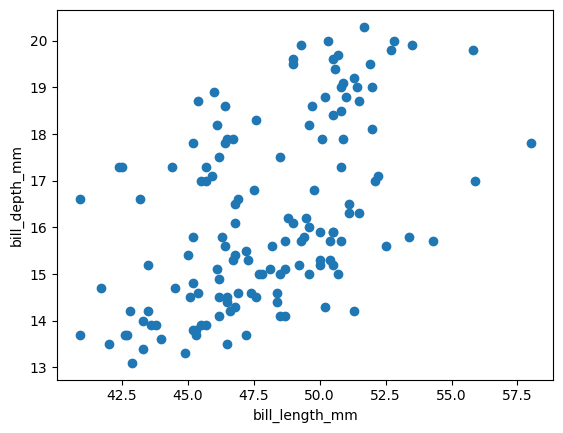

In [198]:
plt.scatter(train_input['bill_length_mm'], train_input['bill_depth_mm'])
plt.xlabel('bill_length_mm')
plt.ylabel('bill_depth_mm')
plt.show()

#산점도가 이상하게 나옴 .... 

In [199]:
kn.kneighbors([[46,15]])

C:\Users\2-23\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


(array([[0.14142136, 0.2236068 , 0.53851648, 0.70710678, 0.72111026]]),
 array([[114,  53, 103,   8,  98]]))

In [200]:
distance, indexes = kn.kneighbors([[46,15]])

C:\Users\2-23\Desktop\DMF\ML\venv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [201]:
indexes

array([[114,  53, 103,   8,  98]])

In [202]:
train_input.iloc[indexes[0]]

,bill_length_mm,bill_depth_mm
245,46.1,15.1
281,46.2,14.9
238,46.2,14.5
242,46.5,14.5
291,46.4,15.6


In [203]:
n_df = train_input.iloc[indexes[0]]

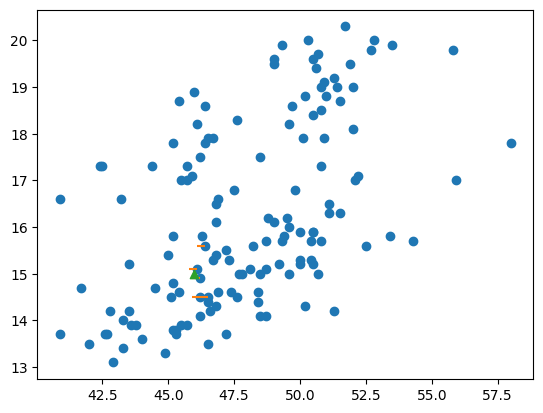

In [204]:
plt.scatter(train_input['bill_length_mm'], train_input['bill_depth_mm'])
plt.scatter(n_df['bill_length_mm'], n_df['bill_depth_mm'], marker = 0)
plt.scatter(46, 15, marker='^')
plt.show()

In [39]:
mean = train_input.mean()
std = train_input.std()

In [41]:
train_scaled = ((train_input - mean) / std)
#비율이 맞아진 친구 

In [209]:
new = ([46, 15] - mean) / std
new

bill_length_mm   -0.618263
bill_depth_mm    -0.641075
dtype: float64

In [42]:
kn.fit(train_scaled, train_target['species'])

KNeighborsClassifier()

In [44]:
kn.score(test_input, test_target)

0.3617021276595745

In [45]:
test_scaled = ((test_input - mean)/std)

In [46]:
kn.score(test_scaled, test_target['species'])
#조금 더 정확하게 나옴

0.9787234042553191